## Advanced Regression Assignment(Surprise Housing)

## Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [144]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the Dataset

In [145]:
#Reading the dataset
housing_dataset=pd.read_csv("train.csv")
housing_dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [146]:
#Checking the necessary details about the dataset
housing_dataset.shape

(1460, 81)

In [147]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Cleaning the Dataset

In [148]:
#Checking the percentage of missing values in the dataset
missing_val=(housing_dataset.isnull().sum()/housing_dataset.isnull().count()*100).sort_values(ascending=False)
missing_val.head(15)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
dtype: float64

In [149]:
#Dropping columns with high missing value percentage
housing_dataset.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],axis=1,inplace=True)

In [150]:
#Imputing all null values
#Imputing for houses with no garages
housing_dataset['GarageCond']=housing_dataset['GarageCond'].fillna('None')
housing_dataset['GarageType']=housing_dataset['GarageType'].fillna('None')
housing_dataset['GarageFinish']=housing_dataset['GarageFinish'].fillna('None')
housing_dataset['GarageQual']=housing_dataset['GarageQual'].fillna('None')
housing_dataset['garage_age']=housing_dataset['GarageQual'].fillna(0)   #No Garage No Age
#Imputing for houses with no basement
housing_dataset['BsmtExposure']=housing_dataset['BsmtExposure'].fillna('None')
housing_dataset['BsmtFinType2']=housing_dataset['BsmtFinType2'].fillna('None')
housing_dataset['BsmtCond']=housing_dataset['BsmtCond'].fillna('None')
housing_dataset['BsmtQual']=housing_dataset['BsmtQual'].fillna('None')
housing_dataset['BsmtFinType1']=housing_dataset['BsmtFinType1'].fillna('None')
#Imputing for houses with no masonery area
housing_dataset['MasVnrArea']=housing_dataset['MasVnrArea'].fillna(0)

In [151]:
#Treating missing values by imputing for columns with missing values less than or equal to 40%
housing_dataset['LotFrontage']=housing_dataset.LotFrontage.fillna(housing_dataset.LotFrontage.median())
housing_dataset['GarageYrBlt']=housing_dataset.GarageYrBlt.fillna(housing_dataset.GarageYrBlt.mean())
housing_dataset['Electrical']=housing_dataset['Electrical'].fillna(housing_dataset['Electrical'].mode()[0])

In [152]:
#Checking the percentage of missing values after modifying the dataset
missing_val=(housing_dataset.isnull().sum()/housing_dataset.isnull().count()*100).sort_values(ascending=False)
missing_val.head(15)

Id              0.0
HalfBath        0.0
GarageType      0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
FullBath        0.0
MSSubClass      0.0
BsmtHalfBath    0.0
BsmtFullBath    0.0
GrLivArea       0.0
LowQualFinSF    0.0
dtype: float64

In [153]:
#Dropping Id column as it is useless in prediction
housing_dataset.drop('Id',axis=1,inplace=True)

## Exploratory Data Analysis

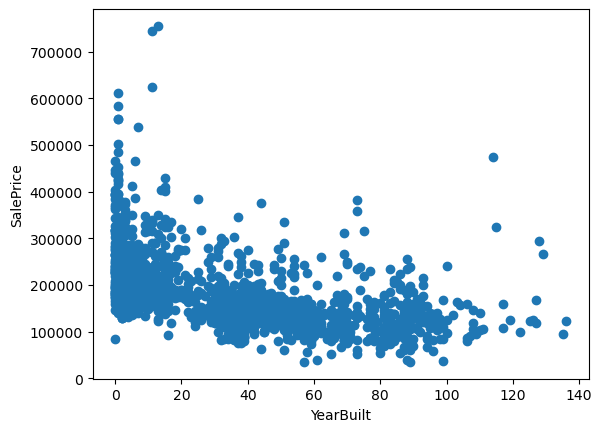

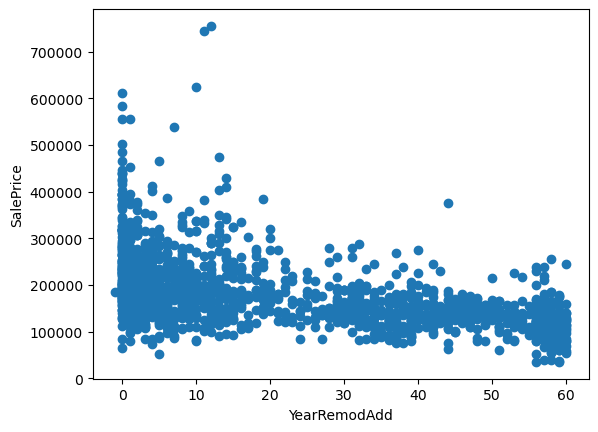

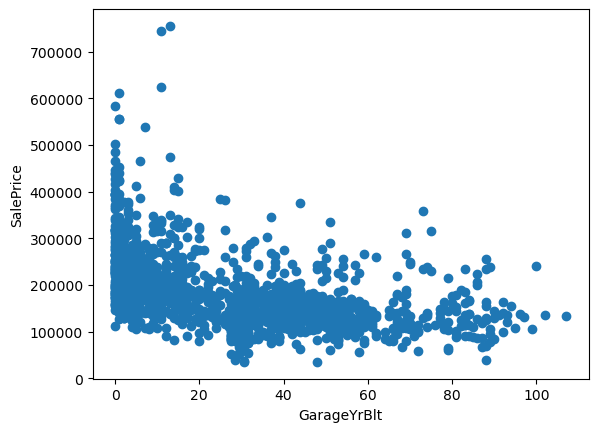

In [154]:
#Comparing YearBuilt,YearRemodAdd,GarageYrBlt with SalePrice
year_col=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
for i in year_col:
    if i!='YrSold':
        dataset=housing_dataset.copy()
        dataset[i]=dataset['YrSold']-dataset[i]
        plt.scatter(dataset[i],dataset['SalePrice'])
        plt.xlabel(i)
        plt.ylabel('SalePrice')
        plt.show()

It looks like that the new properties are costlier than the old properties.

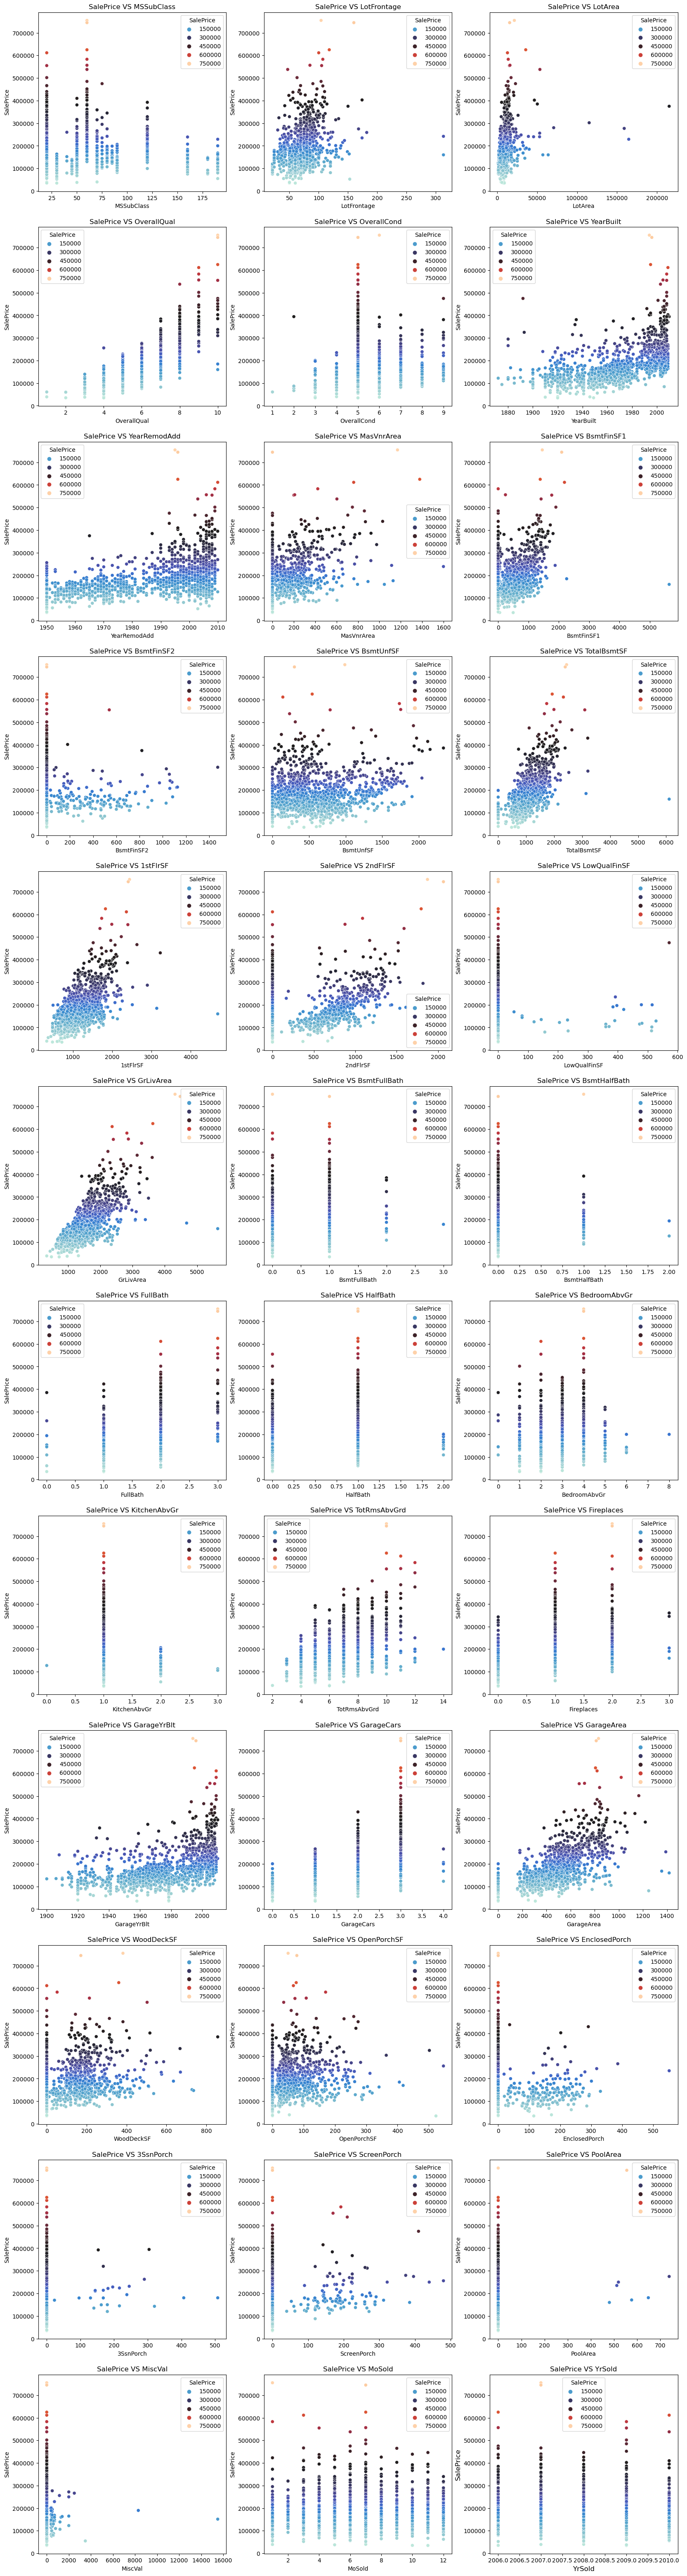

In [155]:
#Visualizing numerical predictor variables with the target variable SalePrice
num_cols=housing_dataset.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(num_cols.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=num_cols,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

Observations from the above plot:-

New properties are costlier than older properties.
Garage Area almost has a linear relationship with Saleprice.
Total Square Footage is linearly related to Saleprice.
Month sold has no effect on the price.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


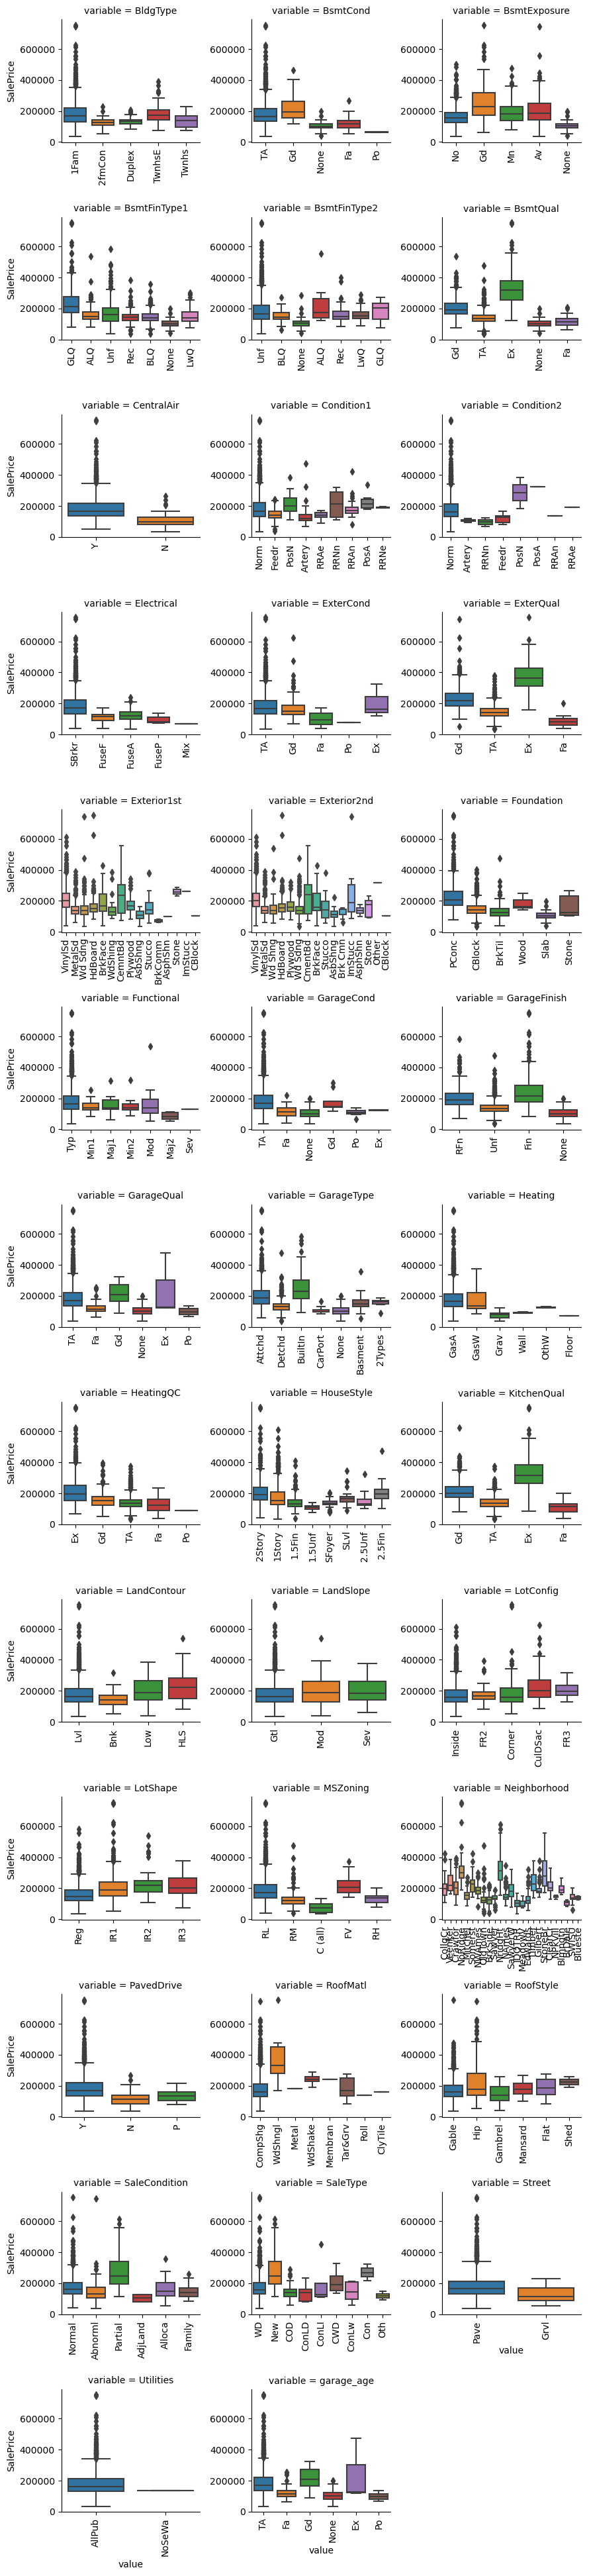

In [156]:
#Visualizing the Categorical features with SalePrice
cat_cols=housing_dataset.select_dtypes(exclude=['int64','float64'])
def facetgrid_boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)
f=pd.melt(housing_dataset,id_vars=['SalePrice'],value_vars=sorted(housing_dataset[cat_cols.columns]))
g=sns.FacetGrid(f,col='variable',col_wrap=3,sharex=False,sharey=False)
g=g.map(facetgrid_boxplot,'value','SalePrice')

There are a few outliers which we handle in the feature engineering section by capping them to a lower percentile. From the above box plots we see that:-

Houses where the basement quality is good and excellent are sold at higher prices compared to others.
Houses with good and excelent garages are sold at higher prices.
Houses with good quality kitchens also impact the price in a postive way.

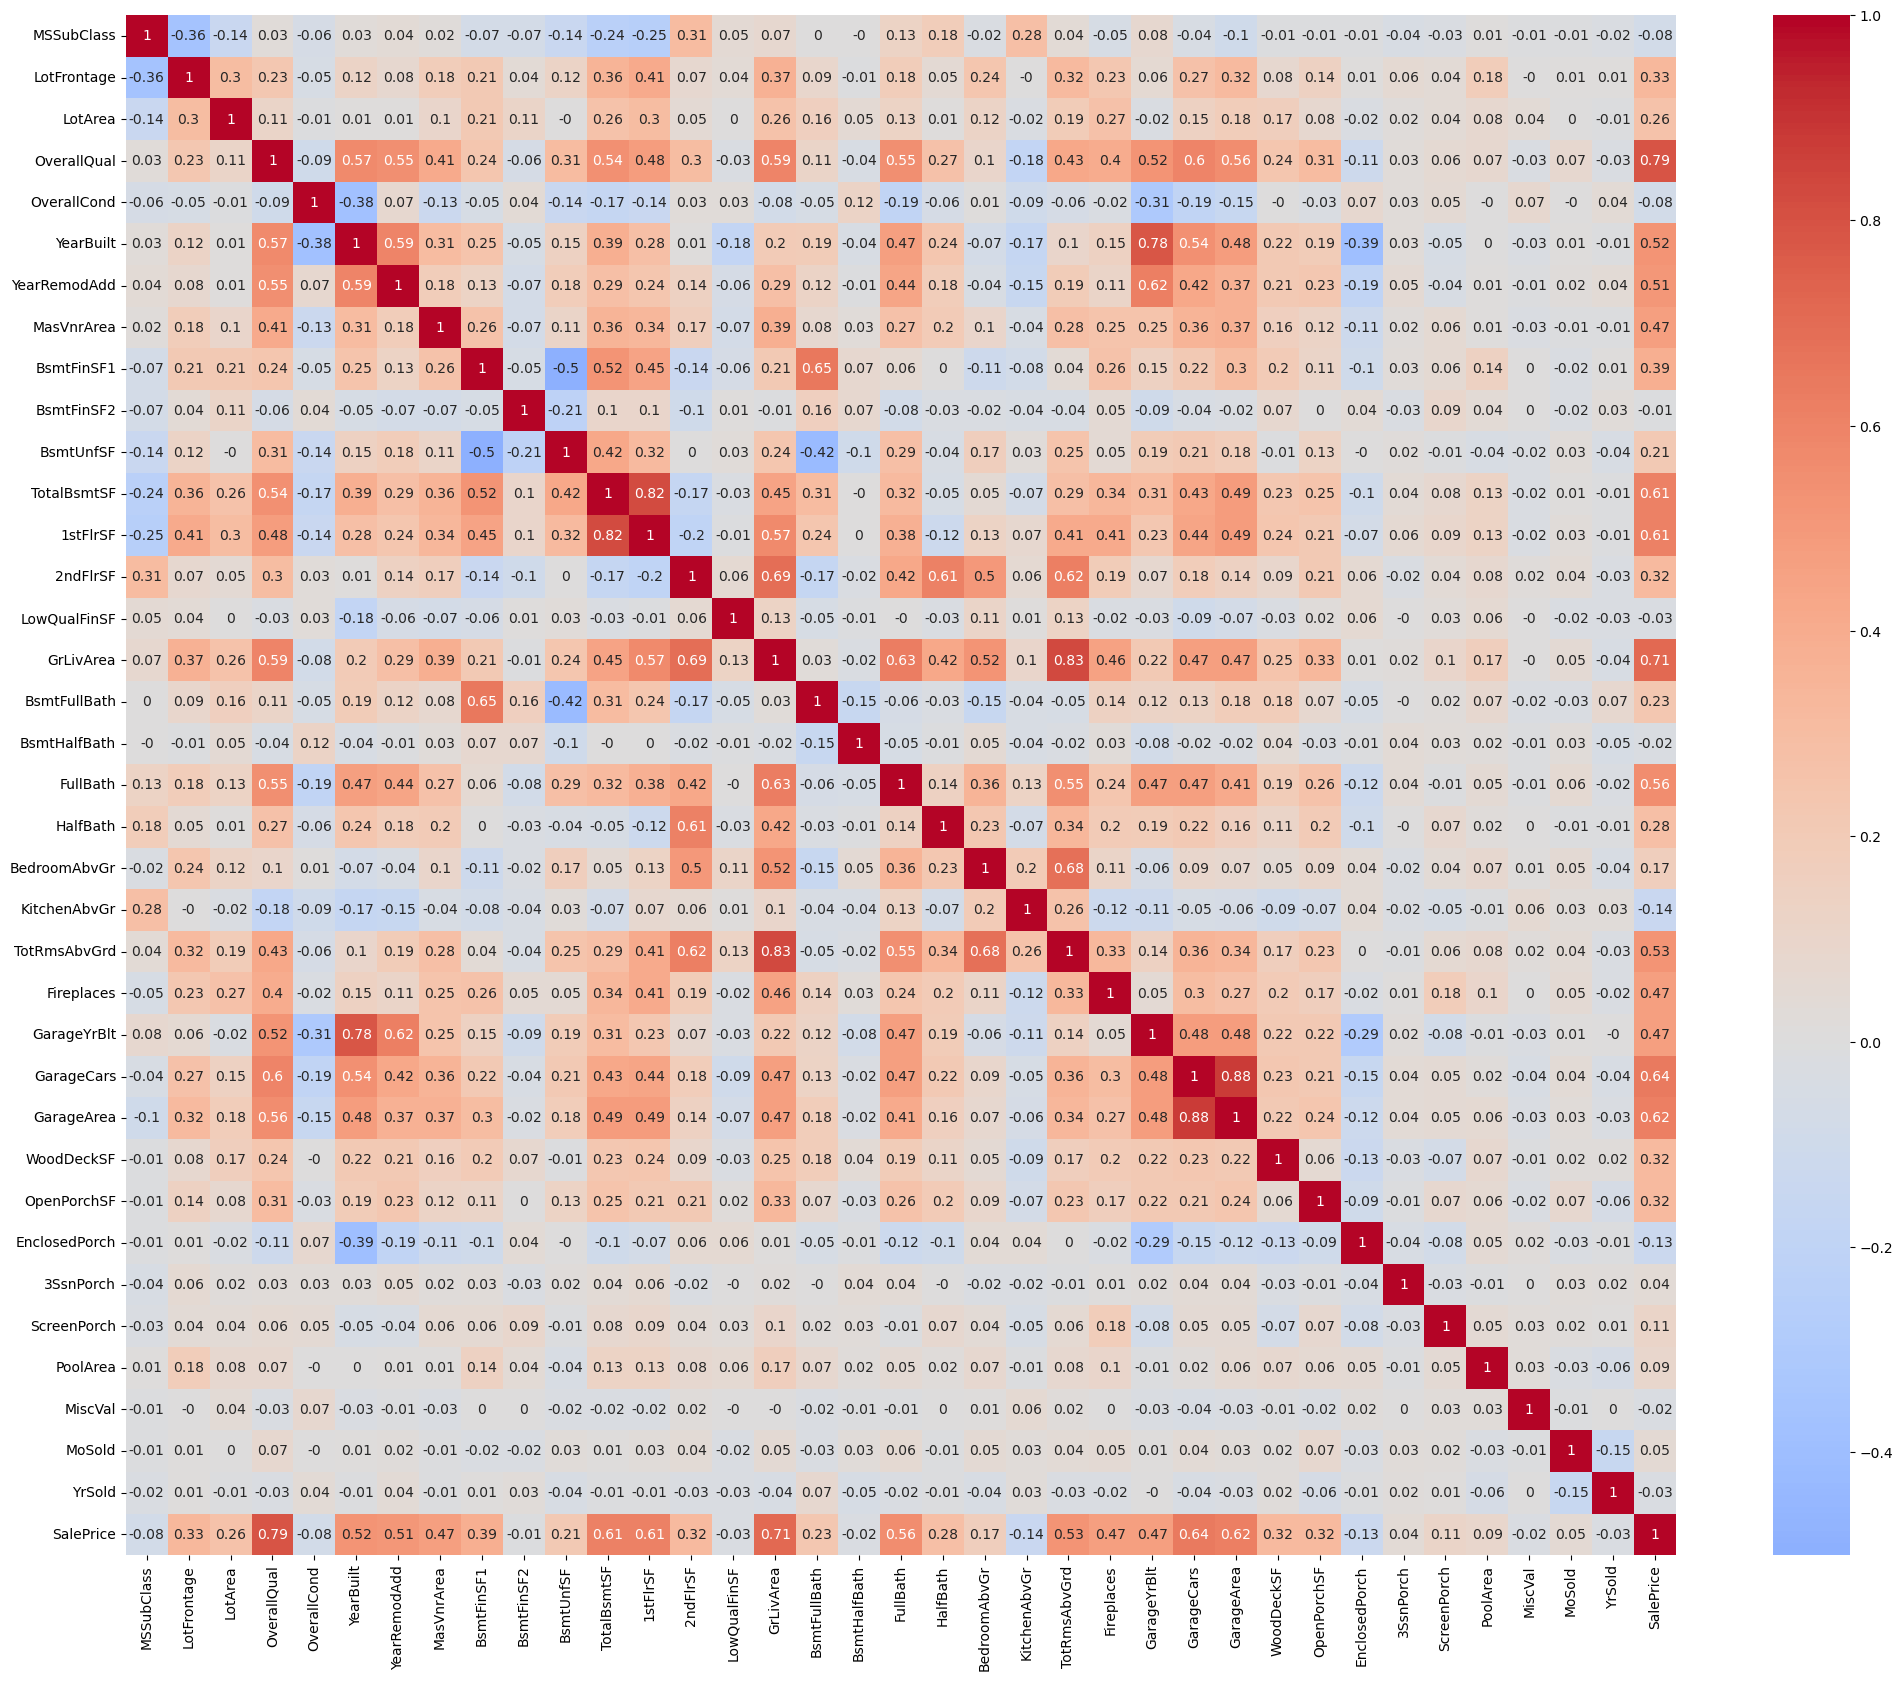

In [157]:
#Checking the correlation
plt.subplots(figsize=(25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(num_cols.corr(),2),cmap='coolwarm',annot=True,center=0)
plt.show()

## Shaping the dataset

In [158]:
#Creating a new column to determine the age of the property
housing_dataset['age']=housing_dataset['YrSold']-housing_dataset['YearBuilt']
housing_dataset['garage_age']=housing_dataset['YrSold']-housing_dataset['GarageYrBlt']
housing_dataset['remodel_age']=housing_dataset['YrSold']-housing_dataset['YearRemodAdd']
housing_dataset.drop('GarageYrBlt',axis=1,inplace=True)

In [159]:
#Converting the Year to String since they are categorical features and should not be treated as numerical features
housing_dataset[['MSSubClass']]=housing_dataset[['MSSubClass']].astype(str) 
housing_dataset['YrSold']=housing_dataset['YrSold'].astype(str)
housing_dataset['MoSold']=housing_dataset['MoSold'].astype(str)
housing_dataset.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         60       RL         65.0     8450   Pave      Reg         Lvl   
1         20       RL         80.0     9600   Pave      Reg         Lvl   
2         60       RL         68.0    11250   Pave      IR1         Lvl   
3         70       RL         60.0     9550   Pave      IR1         Lvl   
4         60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... PoolArea MiscVal MoSold YrSold SaleType  \
0    AllPub    Inside       Gtl  ...        0       0      2   2008       WD   
1    AllPub       FR2       Gtl  ...        0       0      5   2007       WD   
2    AllPub    Inside       Gtl  ...        0       0      9   2008       WD   
3    AllPub    Corner       Gtl  ...        0       0      2   2006       WD   
4    AllPub       FR2       Gtl  ...        0       0     12   2008       WD   

   SaleCondition  SalePrice  garage_age  age remodel_age  
0         Normal     208500         5.0    5           5  
1         Normal     181500        31.0   31          31  
2         Normal     223500         7.0    7           6  
3        Abnorml     140000         8.0   91          36  
4         Normal     250000         8.0    8           8  

[5 rows x 76 columns]

In [160]:
# Trying to remove redundant features
def redundant_features(dataset):
    redundant = []
    for i in dataset.columns:
        counts=dataset[i].value_counts()
        count_max=counts.iloc[0]
        if count_max/len(dataset)*100>99:
            redundant.append(i)
    redundant=list(redundant)
    return redundant

In [161]:
r_f=redundant_features(housing_dataset)
r_f

['Street', 'Utilities', 'PoolArea']

Dropping these features since they have more than 99% of a single category and thus play no part in the prediction

In [162]:
housing_dataset.drop(r_f,axis=1,inplace=True)

In [163]:
housing_dataset.shape

(1460, 73)

In [164]:
# Removing outliers to make the model more robust
# From EDA we see that Living Area, Garage Area, Basement Area and Lot Area. Removing outliers from these. Other outliers will be handled 
# during power transform
def outliers(x):
    list=[]
    outlier_col=['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
    for col in outlier_col:
        Q1=x[col].quantile(.25)
        Q3=x[col].quantile(.99)
        IQR=Q3-Q1
        x=x[(x[col]>=(Q1-(1.5*IQR))) & (x[col]<=(Q3+(1.5*IQR)))] 
    return x  
housing_dataset=outliers(housing_dataset)
housing_dataset.shape

(1455, 73)

In [165]:
#Creating some new features based on the existing features
#Vintage house with remodified version of it plays a important role in prediction(i.e. high price )
housing_dataset['YrBltAndRemod']=housing_dataset['YearBuilt']+housing_dataset['YearRemodAdd']
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
housing_dataset['Total_sqr_footage']=(housing_dataset['BsmtFinSF1']+housing_dataset['BsmtFinSF2']+housing_dataset['1stFlrSF']+housing_dataset['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
housing_dataset['Total_Bathrooms']=(housing_dataset['FullBath']+(0.5*housing_dataset['HalfBath'])+housing_dataset['BsmtFullBath']+(0.5*housing_dataset['BsmtHalfBath']))
#Creating derived column for total porch area 
housing_dataset['Total_porch_sf']=(housing_dataset['OpenPorchSF']+housing_dataset['3SsnPorch']+housing_dataset['EnclosedPorch']+housing_dataset['ScreenPorch']+housing_dataset['WoodDeckSF'])

In [166]:
#Creating dummy variables for categorical columns
categorical_cols=housing_dataset.select_dtypes(exclude=['int64','float64'])
dataset_dummies=pd.get_dummies(categorical_cols,drop_first=True,dtype='int')
print(categorical_cols.shape)

(1455, 38)


In [167]:
#Merging the dummies to the dataset
housing_dataset=pd.concat([housing_dataset,dataset_dummies],axis=1)
housing_dataset=housing_dataset.drop(categorical_cols,axis=1)

In [168]:
#Checking the distribution of dependent variable i.e,SalePrice
housing_dataset['SalePrice'].describe()

count      1455.000000
mean     180619.928522
std       79300.054456
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\RIDDHIMAN\AppData\Local\Temp\ipykernel_12216\1164240944.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_dataset['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

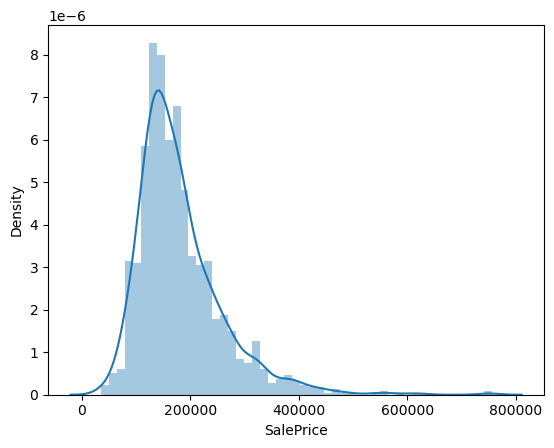

In [169]:
sns.distplot(housing_dataset['SalePrice'])

In [170]:
#skewness and kurtosis
print("Skewness: %f" % housing_dataset['SalePrice'].skew())

Skewness: 1.897060


In [171]:
#Transforming to form normal distribution
housing_dataset['SalePrice']=np.log(housing_dataset.SalePrice)

In [172]:
housing_dataset['SalePrice'].describe()

count    1455.000000
mean       12.022547
std         0.398956
min        10.460242
25%        11.774520
50%        12.001505
75%        12.271392
max        13.534473
Name: SalePrice, dtype: float64

C:\Users\RIDDHIMAN\AppData\Local\Temp\ipykernel_12216\1164240944.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_dataset['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

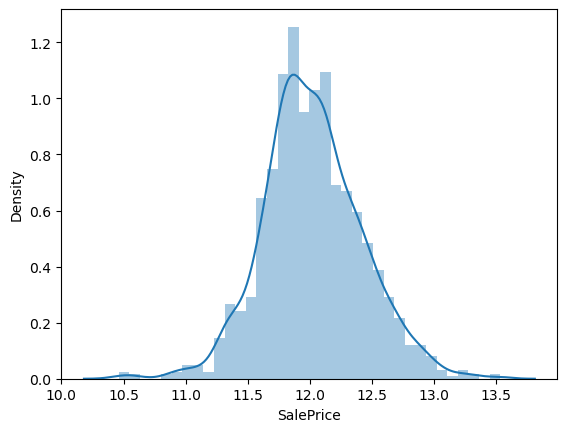

In [173]:
sns.distplot(housing_dataset['SalePrice'])

In [174]:
#skewness 
print("Skewness: %f" % housing_dataset['SalePrice'].skew())

Skewness: 0.123717


In [175]:
x=housing_dataset.drop('SalePrice',axis=1)
y=housing_dataset['SalePrice']

In [176]:
#Checking co-related features
corr=x.corr()
corr1=corr[abs(corr)>=.6]
corr2=corr.where(~np.tril(np.ones(corr.shape)).astype(bool))  #To remove repetition and 1 correlations
corr_result=corr2.stack()
print(corr_result[(abs(corr_result) > 0.6)])

OverallQual           GarageCars               0.602025
                      YrBltAndRemod            0.628465
                      ExterQual_TA            -0.647338
YearBuilt             garage_age              -0.779894
                      age                     -0.999036
                                                 ...   
SaleType_New          SaleCondition_Normal    -0.644164
                      SaleCondition_Partial    0.986718
SaleType_WD           SaleCondition_Normal     0.632805
                      SaleCondition_Partial   -0.768294
SaleCondition_Normal  SaleCondition_Partial   -0.652835
Length: 127, dtype: float64


In [177]:
x.drop(['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
        '1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars',
        'WoodDeckSF','YrBltAndRemod','Total_Bathrooms','MSSubClass_160','MSSubClass_190','MSSubClass_20',
        'MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90',
        'MSZoning_FV','MSZoning_RL','Neighborhood_NPkVill','Condition1_Feedr','Condition2_Feedr','Condition2_RRAe',
        'HouseStyle_1Story','RoofStyle_Gable','Exterior2nd_BrkFace',
        'Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood',
        'Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','ExterQual_Gd','ExterQual_TA',
        'ExterCond_Gd','Foundation_CBlock','Foundation_Slab','BsmtQual_Gd','BsmtQual_None','BsmtCond_Gd','BsmtCond_None',
        'BsmtCond_Po','BsmtExposure_None','BsmtFinType1_None','Heating_GasA',
        'KitchenQual_Gd','GarageType_Attchd','GarageType_None','GarageFinish_None','GarageQual_Fa',
        'GarageQual_Gd','GarageQual_None','GarageQual_Po','GarageQual_TA','GarageCond_None','GarageCond_Po',
        'GarageCond_TA','SaleType_New','SaleType_WD','SaleCondition_Normal',
        'Foundation_PConc','Foundation_PConc'],
         axis=1,inplace=True)

In [178]:
x.shape

(1455, 190)

## Data preprocessing

In [179]:
#Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=100)

In [180]:
#Scaling the dataset using a Standard Scaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train)
x_train.columns=x.columns
x_test=scaler.transform(x_test)
x_test=pd.DataFrame(x_test)
x_test.columns=x.columns
x_train.head()

LotFrontage   LotArea  OverallCond  LowQualFinSF  BsmtFullBath  \
0     0.068493  0.052116     0.428571           0.0           0.5   
1     0.136986  0.128504     0.428571           0.0           0.5   
2     0.164384  0.118124     0.428571           0.0           0.0   
3     0.301370  0.106880     0.428571           0.0           0.0   
4     0.236301  0.143217     0.428571           0.0           0.5   

   BsmtHalfBath  TotRmsAbvGrd  GarageArea  OpenPorchSF  EnclosedPorch  ...  \
0           0.0      0.333333    0.418705     0.000000       0.307971  ...   
1           0.0      0.555556    0.618705     0.083665       0.000000  ...   
2           0.0      0.555556    0.312230     0.095618       0.000000  ...   
3           0.0      0.222222    0.323741     0.000000       0.000000  ...   
4           0.0      0.444444    0.505036     0.089641       0.000000  ...   

   SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  \
0           0.0           0.0             0.0             0.0             0.0   
1           0.0           0.0             0.0             0.0             0.0   
2           0.0           0.0             0.0             0.0             0.0   
3           0.0           0.0             0.0             0.0             0.0   
4           0.0           0.0             0.0             0.0             0.0   

   SaleType_Oth  SaleCondition_AdjLand  SaleCondition_Alloca  \
0           0.0                    0.0                   0.0   
1           0.0                    0.0                   0.0   
2           0.0                    0.0                   0.0   
3           0.0                    0.0                   0.0   
4           0.0                    0.0                   0.0   

   SaleCondition_Family  SaleCondition_Partial  
0                   0.0                    0.0  
1                   0.0                    0.0  
2                   0.0                    0.0  
3                   0.0                    0.0  
4                   0.0                    0.0  

[5 rows x 190 columns]

## Ridge regression

Fitting 11 folds for each of 28 candidates, totalling 308 fits


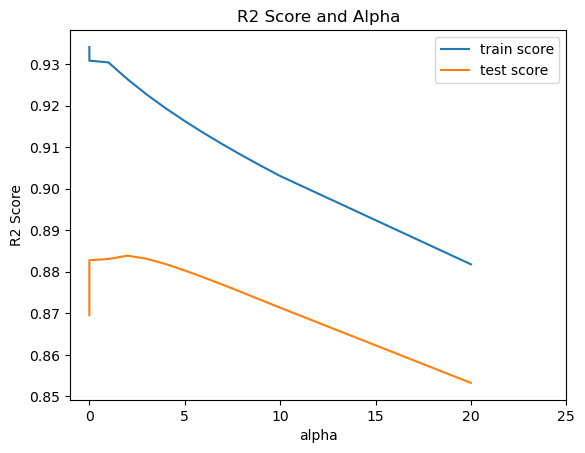

The optimum alpha is 2
The R2 Score of the model on the test dataset for optimum alpha is 0.8466415249396139
The MSE of the model on the test dataset for optimum alpha is 0.025581912039723625


In [181]:
# list of alphas to tune
params={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge=Ridge()
#Using RFE to find top 300 variables
rfe=RFE(estimator=Ridge(),n_features_to_select=300)
rfe=rfe.fit(x_train,y_train)
col=x_train.columns[rfe.support_]
x_train_rfe=x_train[col]
x_test_rfe=x_test[col]
#cross validation
folds=11
model_cv=GridSearchCV(estimator=ridge,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=1)            
model_cv.fit(x_train_rfe,y_train) 
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results=cv_results[cv_results['param_alpha']<=30]
#plotting mean test and train scoes with alpha 
cv_results['param_alpha']=cv_results['param_alpha'].astype('int32')
#plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'],loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()
alpha=cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final=Ridge(alpha=alpha)
ridge_final.fit(x_train_rfe,y_train)
ridge_coef=ridge_final.coef_
y_test_pred=ridge_final.predict(x_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test,y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is',mean_squared_error(y_test,y_test_pred))

In [182]:
# Chekcing the VIF
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
high_vif=vif[vif['VIF']>10]
high_vif

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Features     VIF
66        Condition2_Norm  258.99
154        Functional_Typ  120.73
133      BsmtFinType2_Unf   88.67
142          CentralAir_Y   38.79
102   Exterior1st_VinylSd   37.60
14                    age   36.63
29        LandContour_Lvl   35.31
16      Total_sqr_footage   32.02
164          PavedDrive_Y   29.88
2             OverallCond   28.42
6            TotRmsAbvGrd   22.94
146      Electrical_SBrkr   21.96
7              GarageArea   19.01
47     Neighborhood_NAmes   17.98
119           BsmtCond_TA   17.88
98    Exterior1st_MetalSd   16.53
59        Condition1_Norm   16.23
51   Neighborhood_OldTown   16.02
96    Exterior1st_HdBoard   14.81
103   Exterior1st_Wd Sdng   14.16
0             LotFrontage   14.00
114          ExterCond_TA   13.38
13             garage_age   12.78
1                 LotArea   10.53

In [183]:
#Dropping columns with high VIF
x_train_rfe2=x_train_rfe.drop(high_vif.Features,axis=1)
x_test_rfe2 = x_test_rfe.drop(high_vif.Features,axis=1)

In [184]:
#Displaing the co-efficients of the model
ridge_coeff2=pd.DataFrame(np.atleast_2d(ridge_coef2),columns=x_train_rfe2.columns)
ridge_coeff2=ridge_coeff2.T
ridge_coeff2.rename(columns={0:'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

Ridge Co-Efficient
Neighborhood_NridgHt             0.273916
Total_porch_sf                   0.237259
Neighborhood_NoRidge             0.221662
Neighborhood_Crawfor             0.201495
Neighborhood_StoneBr             0.198474
BsmtExposure_Gd                  0.136391
OpenPorchSF                      0.126886
Exterior1st_BrkFace              0.121172
Condition2_PosA                  0.101061
RoofStyle_Hip                    0.098515
HouseStyle_2Story                0.089006
Exterior1st_CemntBd              0.080674
Neighborhood_NWAmes              0.078999
SaleCondition_Alloca             0.078835
HouseStyle_2.5Fin                0.076579
RoofMatl_WdShngl                 0.074949
SaleCondition_Partial            0.074412
LotConfig_CulDSac                0.073452
Exterior1st_Stucco               0.068428
Neighborhood_BrkSide             0.066988

## Lasso regression

In [185]:
#Creating a model with an arbitrary alpha to understand the value ranges
lasso1=Lasso(alpha=0.0001)        
lasso1.fit(x_train_rfe2,y_train) 
y_test_pred=lasso1.predict(x_test_rfe2)
print('The R2 Score of the model on the test dataset for 0.0001 alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The R2 Score of the model on the test dataset for 0.0001 alpha is 0.7194288080003859
The MSE of the model on the test dataset for optimum alpha is 0.04680241865856007


Fitting 11 folds for each of 11 candidates, totalling 121 fits


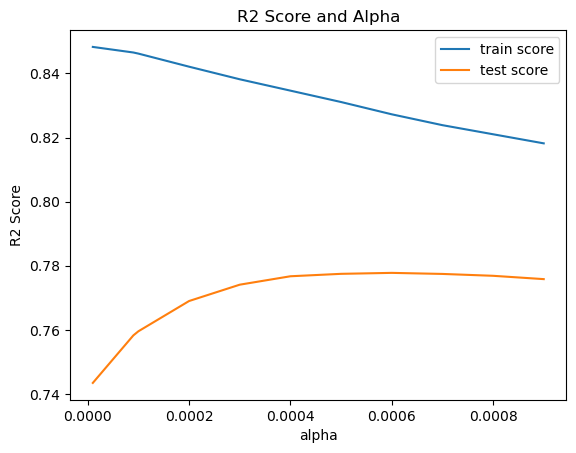

The optimum alpha is 0.0006
The R2 Score of the model on the test dataset for optimum alpha is 0.7108177408887876
The MSE of the model on the test dataset for optimum alpha is 0.04823884114078889


In [186]:
#Building a Lasso Model with GridSearch CV to find the optimum alpha
params={'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso=Lasso(random_state=100)
#cross validation
folds=11
model_cv=GridSearchCV(estimator=lasso,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose = 1)            
model_cv.fit(x_train_rfe2,y_train) 
cv_results=pd.DataFrame(model_cv.cv_results_)
#plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'],loc='upper right')
plt.show()
alpha=cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
lasso_final2=Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(x_train_rfe2,y_train)
lasso_coef2=lasso_final2.coef_
y_test_pred=lasso_final2.predict(x_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [187]:
#Displaing the co-efficients of the model
lasso_coeff2=pd.DataFrame(np.atleast_2d(lasso_coef2),columns=x_train_rfe2.columns)
lasso_coeff2=lasso_coeff2.T
lasso_coeff2.rename(columns={0:"Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'],ascending=False,inplace=True)
lasso_coeff2.head(20)

Lasso Co-Efficient
Neighborhood_NridgHt             0.317600
Total_porch_sf                   0.274292
Neighborhood_NoRidge             0.272727
Neighborhood_StoneBr             0.255642
Neighborhood_Crawfor             0.242031
BsmtExposure_Gd                  0.138328
Exterior1st_BrkFace              0.137421
OpenPorchSF                      0.132951
RoofStyle_Hip                    0.098606
Neighborhood_Somerst             0.090043
Neighborhood_NWAmes              0.086915
Exterior1st_CemntBd              0.084886
HouseStyle_2Story                0.083804
Neighborhood_Timber              0.076025
SaleCondition_Partial            0.068456
LotConfig_CulDSac                0.066015
Exterior1st_Stucco               0.065408
Neighborhood_BrkSide             0.062150
Neighborhood_Veenker             0.052131
Exterior1st_Plywood              0.050164

We are able to achieve an R2 score of 0.84 approx on Ridge and 0.71 on Lasso Model. The follwing factors influence the house price the most as demosntrated by both the models:-
1)Neighbourhood is Northridge height
2)Total Square Footage of porch
3)Neighbourhood is Northridge
4)Neighbourhood is Crawford
5)Neighbourhood is StoneBrooks
6)Basement Exposure is Good
7)open Porch Square Footage

1)What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Ans:The Optimal value of alpha for ridge is 2 and for lasso it is 0.0006.

In [191]:
#Building Ridge Model by doubling the value of alpha to 4
ridge_2= Ridge(alpha=4,random_state=100)
ridge_2.fit(x_train_rfe2,y_train)
ridge_2_coef = ridge_2.coef_
y_test_pred = ridge_2.predict(x_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The Mean Squared Error of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
ridge_2_coeff = pd.DataFrame(np.atleast_2d(ridge_2_coef),columns=x_train_rfe2.columns)
ridge_2_coeff = ridge_2_coeff.T
ridge_2_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_2_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_2_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.7195431446291505
The Mean Squared Error of the model on the test dataset for doubled alpha is 0.04678334602772684
The most important predictor variables are as follows:


Ridge Doubled Alpha Co-Efficient
Neighborhood_NridgHt                           0.284417
Total_porch_sf                                 0.240801
Neighborhood_NoRidge                           0.233808
Neighborhood_StoneBr                           0.213485
Neighborhood_Crawfor                           0.210620
BsmtExposure_Gd                                0.137013
OpenPorchSF                                    0.128831
Exterior1st_BrkFace                            0.124436
Condition2_PosA                                0.120391
RoofStyle_Hip                                  0.097365
HouseStyle_2Story                              0.087783
SaleCondition_Alloca                           0.087734
HouseStyle_2.5Fin                              0.087545
Exterior1st_CemntBd                            0.086992
RoofMatl_WdShngl                               0.084805
Neighborhood_NWAmes                            0.080865
LotConfig_CulDSac                              0.074998
SaleCondition_Partial                          0.073052
Neighborhood_Somerst                           0.072816
Exterior1st_Stucco                             0.072246

In [189]:
#Building Lasso Model by doubling the value of alpha to 0.0012
lasso_2 = Lasso(alpha=0.0012,random_state=100)
lasso_2.fit(x_train_rfe2,y_train)
lasso_2_coef = lasso_2.coef_
y_test_pred = lasso_2.predict(x_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The Mean Squared Error of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
lasso_2_coeff = pd.DataFrame(np.atleast_2d(lasso_2_coef),columns=x_train_rfe2.columns)
lasso_2_coeff = lasso_2_coeff.T
lasso_2_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_2_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_2_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.6970141600260733
The Mean Squared Error of the model on the test dataset for doubled alpha is 0.050541433099427796
The most important predictor variables are as follows:


Lasso Doubled Alpha Co-Efficient
Neighborhood_NridgHt                           0.297583
Total_porch_sf                                 0.294372
Neighborhood_NoRidge                           0.242419
Neighborhood_Crawfor                           0.216885
Neighborhood_StoneBr                           0.214436
BsmtExposure_Gd                                0.136540
Exterior1st_BrkFace                            0.128091
RoofStyle_Hip                                  0.105418
OpenPorchSF                                    0.103967
HouseStyle_2Story                              0.089159
Neighborhood_NWAmes                            0.082555
SaleCondition_Partial                          0.074874
Neighborhood_Somerst                           0.068448
LotConfig_CulDSac                              0.056110
BsmtFinType1_GLQ                               0.044704
Exterior1st_CemntBd                            0.043730
Neighborhood_Timber                            0.042065
BsmtFullBath                                   0.037336
Neighborhood_BrkSide                           0.036095
GarageType_BuiltIn                             0.034154

Since the alpha value was quite small, doubling it does not do any significant change in both the models and the R2 and Mean Squared Error remains almost the same. The most important predictor variables also remain the same.

3)After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [192]:
#Removing the 5 most important predictor variables from the incoming dataset
x_test_rfe3 = x_test_rfe2.drop(['Total_porch_sf','Neighborhood_NridgHt','Neighborhood_NoRidge','Neighborhood_Crawfor','BsmtExposure_Gd'],axis=1)
x_train_rfe3 = x_train_rfe2.drop(['Total_porch_sf','Neighborhood_NridgHt','Neighborhood_NoRidge','Neighborhood_Crawfor','BsmtExposure_Gd'],axis=1)
#Building Lasso Model with the new dataset
lasso_3 = Lasso(alpha=0.0001,random_state=100)
lasso_3.fit(x_train_rfe3,y_train)
lasso_3_coef = lasso_3.coef_
y_test_pred = lasso_3.predict(x_test_rfe3)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The Mean Squared Error of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso_3_coeff = pd.DataFrame(np.atleast_2d(lasso_3_coef),columns=x_train_rfe3.columns)
lasso_3_coeff = lasso_3_coeff.T
lasso_3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso_3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_3_coeff.head(5)

The R2 Score of the model on the test dataset is 0.6554933600613291
The Mean Squared Error of the model on the test dataset is 0.05746756777896735
The most important predictor variables are as follows:


Lasso Co-Efficient
Condition2_PosA              0.577634
OpenPorchSF                  0.251326
Electrical_Mix               0.243102
RoofMatl_WdShngl             0.229232
HouseStyle_2.5Fin            0.207250